# HSCT survival data exploration

## Notebook set-up

In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Load Kaggle login credentials from env
if Path('./.env').is_file():
    load_dotenv()

else:
    print('Put your Kaggle credentials in ./.env')

# Create data directory if needed
Path('./data/raw').mkdir(parents=True, exist_ok=True)

## 1. Data download

In [3]:
! kaggle competitions download -c equity-post-HCT-survival-predictions -p ./data/raw
! cd ./data/raw && unzip -o ./equity-post-HCT-survival-predictions.zip

equity-post-HCT-survival-predictions.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./equity-post-HCT-survival-predictions.zip
  inflating: test.csv                
  inflating: data_dictionary.csv     
  inflating: sample_submission.csv   
  inflating: train.csv               


## 2. Datasets
### 2.1. Data dictionary

In [4]:
dictionary_df=pd.read_csv('./data/raw/data_dictionary.csv')
dictionary_df.head(len(dictionary_df))

,variable,description,type,values
0,dri_score,Refined disease risk index,Categorical,['Intermediate' 'High' 'N/A - non-malignant in...
1,psych_disturb,Psychiatric disturbance,Categorical,['Yes' 'No' nan 'Not done']
2,cyto_score,Cytogenetic score,Categorical,['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...
3,diabetes,Diabetes,Categorical,['No' 'Yes' nan 'Not done']
4,hla_match_c_high,Recipient / 1st donor allele level (high resol...,Numerical,NaN
5,hla_high_res_8,Recipient / 1st donor allele-level (high resol...,Numerical,NaN
6,tbi_status,TBI,Categorical,"['No TBI' 'TBI + Cy +- Other' 'TBI +- Other, <..."
7,arrhythmia,Arrhythmia,Categorical,['No' nan 'Yes' 'Not done']
8,hla_low_res_6,Recipient / 1st donor antigen-level (low resol...,Numerical,NaN
9,graft_type,Graft type,Categorical,['Peripheral blood' 'Bone marrow']


### 2.2. Training data

In [5]:
training_df=pd.read_csv('./data/raw/train.csv')
training_df.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [6]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

### 2.1. Training labels

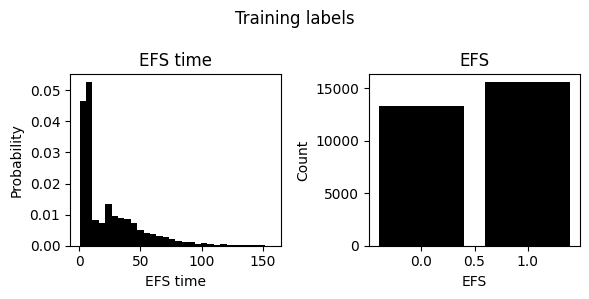

In [9]:
# Set-up a 1x2 figure
fig, axs=plt.subplots(1,2, figsize=(6,3))
axs=axs.flatten()

fig.suptitle('Training labels')

axs[0].set_title('EFS time')
axs[0].hist(training_df['efs_time'], density=True, bins=30, color='black')
axs[0].set_xlabel('EFS time')
axs[0].set_ylabel('Probability')

axs[1].set_title('EFS')
axs[1].bar(training_df['efs'].value_counts().index, training_df['efs'].value_counts(), color='black')
axs[1].set_xlabel('EFS')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 3. Data distributions

### 3.1. Split categorical and numerical features

In [6]:
categorical_feature_names=dictionary_df['variable'][dictionary_df['type'] == 'Categorical']
numerical_feature_names=dictionary_df['variable'][dictionary_df['type'] == 'Numerical']

categorical_features_df=training_df[categorical_feature_names]
numerical_features_df=training_df[numerical_feature_names]

### 3.2. Plot numerical feature distributions

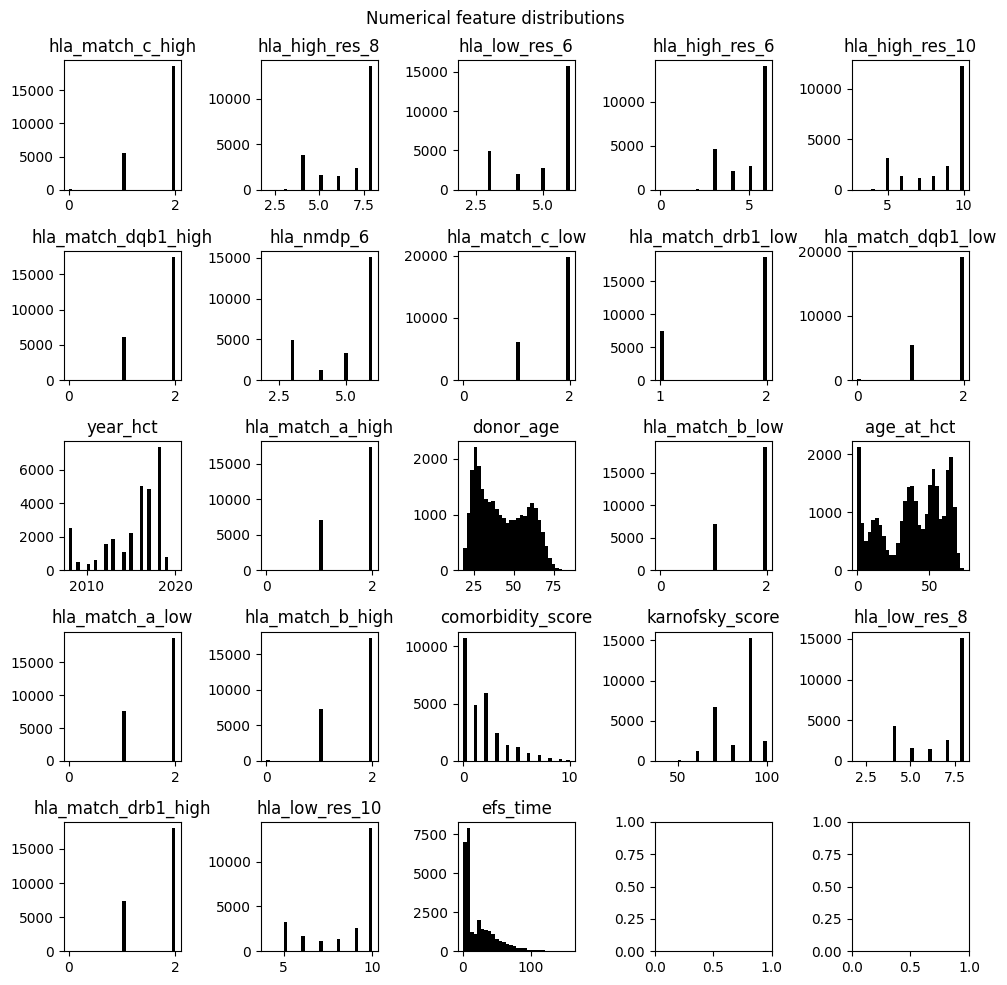

In [7]:
# Set-up a 5x5 figure
fig, axs=plt.subplots(5,5, figsize=(10,10))
axs=axs.flatten()

fig.suptitle('Numerical feature distributions')

# Plot each feature
for ax, feature in zip(axs, numerical_features_df.columns):
    ax.set_title(feature)
    ax.hist(numerical_features_df[feature], bins=30, color='black')

plt.tight_layout()
plt.show()

### 3.3. Plot categorical features

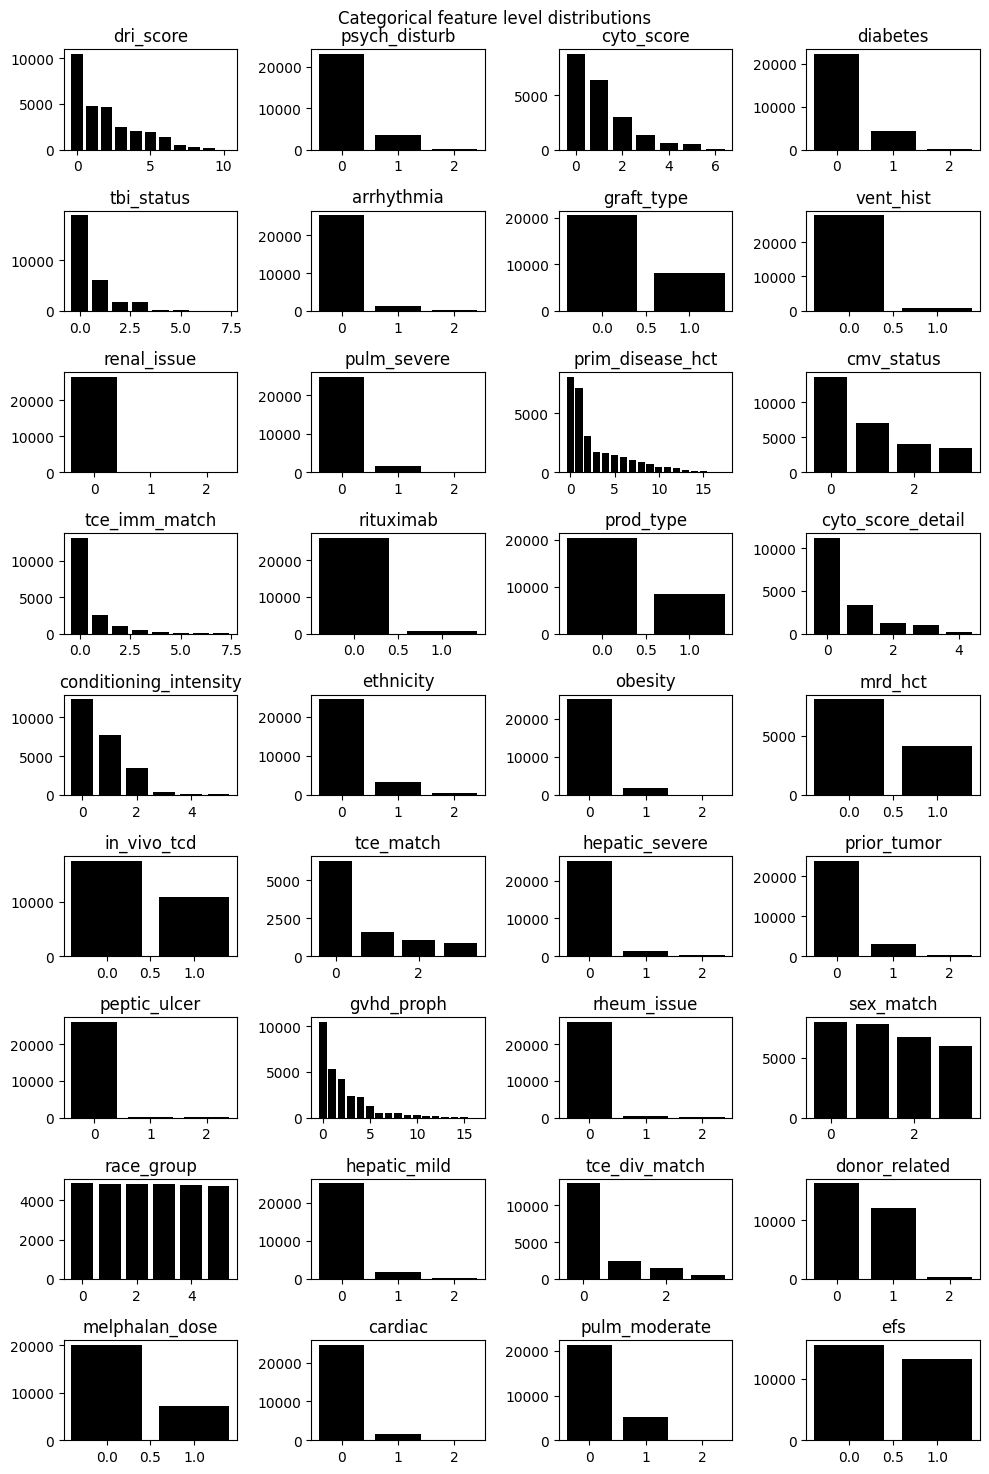

In [8]:
# Set-up a 5x5 figure
fig, axs=plt.subplots(9,4, figsize=(10,15))
axs=axs.flatten()

fig.suptitle('Categorical feature level distributions')

# Plot each feature
for ax, feature in zip(axs, categorical_features_df.columns):
    level_counts=categorical_features_df[feature].value_counts()
    ax.set_title(feature)
    ax.bar(list(range(len(level_counts.index))), level_counts.values, color='black')

plt.tight_layout()
plt.show()